# TR Text Classification

## Naive Bayes - Baseline Model

## Import Packages

In [1]:
!pip install nlp

In [2]:
import numpy as np
import pandas as pd

import tensorflow as tf
import matplotlib.pyplot as plt
import nlp
import random

from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score
from sklearn.metrics import balanced_accuracy_score
from sklearn.metrics import f1_score

from tensorflow.keras.preprocessing.text import Tokenizer
from tensorflow.keras.preprocessing.sequence import pad_sequences

In [3]:
print('Using TensorFlow version', tf.__version__)

Using TensorFlow version 2.1.0


In [4]:
!python -V

Python 3.6.9 :: Anaconda, Inc.


In [5]:
from tensorflow.python.client import device_lib
print(device_lib.list_local_devices())

[name: "/device:CPU:0"
device_type: "CPU"
memory_limit: 268435456
locality {
}
incarnation: 7353016217472753943
, name: "/device:XLA_CPU:0"
device_type: "XLA_CPU"
memory_limit: 17179869184
locality {
}
incarnation: 3419553010960107512
physical_device_desc: "device: XLA_CPU device"
, name: "/device:XLA_GPU:0"
device_type: "XLA_GPU"
memory_limit: 17179869184
locality {
}
incarnation: 8839891446700788240
physical_device_desc: "device: XLA_GPU device"
]


In [6]:
def show_history(h):
    epochs_trained = len(h.history['loss'])
    plt.figure(figsize=(16, 6))

    plt.subplot(1, 2, 1)
    plt.plot(range(0, epochs_trained), h.history.get('accuracy'), label='Training')
    plt.plot(range(0, epochs_trained), h.history.get('val_accuracy'), label='Validation')
    plt.ylim([0., 1.])
    plt.xlabel('Epochs')
    plt.ylabel('Accuracy')
    plt.legend()

    plt.subplot(1, 2, 2)
    plt.plot(range(0, epochs_trained), h.history.get('loss'), label='Training')
    plt.plot(range(0, epochs_trained), h.history.get('val_loss'), label='Validation')
    plt.xlabel('Epochs')
    plt.ylabel('Loss')
    plt.legend()
    plt.show()

In [7]:
def show_confusion_matrix(y_true, y_pred, classes):
    from sklearn.metrics import confusion_matrix
    
    cm = confusion_matrix(y_true, y_pred, normalize='true')

    plt.figure(figsize=(8, 8))
    sp = plt.subplot(1, 1, 1)
    ctx = sp.matshow(cm)
    plt.xticks(list(range(0, 6)), labels=classes)
    plt.yticks(list(range(0, 6)), labels=classes)
    plt.colorbar(ctx)
    plt.show()

## Import Data

In [8]:
df_model = pd.read_csv("./1-Title_Classification/train1.csv")

## EDA

In [9]:
# Drop the ID columns
df_model = df_model.drop(columns = ['ID'])

In [10]:
# distribution of topics

df_model['TOPIC'].value_counts()

0    3107
1    2406
2    2404
Name: TOPIC, dtype: int64

In [11]:
df_model.head()

,TITLE,TOPIC
0,RITE AID CORP <RAD> SETS DIVIDEND,0
1,DEL E. WEBB INVESTMENT <DWPA> 4TH QTR NET,0
2,GENERAL HOST CORP <GH> SETS QUARTERLY,0
3,PROFESSOR LIFTS BANC TEXAS <BTX> PREFERRED STAKE,1
4,WINCHELL'S DONUT <WDH> SETS INITIAL QUARTERLY,0


In [12]:
X_model = df_model['TITLE'].values

In [13]:
y_model = df_model['TOPIC'].values

In [14]:
X_train, X_test, y_train, y_test  = train_test_split(X_model,
                                                     y_model,
                                                     test_size=0.2,
                                                     random_state=42)

## Tokenizer

In [15]:
tokenizer = Tokenizer(num_words=10000, oov_token='<UNK>')

tokenizer.fit_on_texts(X_train)

print(tokenizer.texts_to_sequences([X_train[0]]))

[[466, 2379, 5, 3859, 19, 3, 4]]


## Task 5: Padding and Truncating Sequences

1. Checking length of the tweets
2. Creating padded sequences

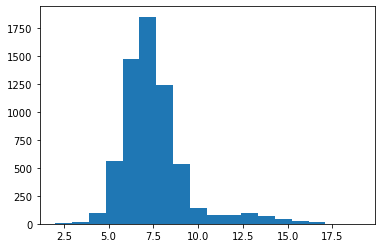

In [16]:
lengths = [len(t.split(' ')) for t in X_train]

plt.hist(lengths, bins=len(set(lengths)))
plt.show()

In [17]:
max(lengths)

19

In [18]:
def get_sequences(tokenizer, tweets):
    sequences = tokenizer.texts_to_sequences(tweets)
    padded_sequences = pad_sequences(sequences, truncating='post', maxlen=35, padding='post')
    return padded_sequences

In [19]:
padded_train_sequences = get_sequences(tokenizer, X_train)

In [20]:
padded_train_sequences[0]

array([ 466, 2379,    5, 3859,   19,    3,    4,    0,    0,    0,    0,
          0,    0,    0,    0,    0,    0,    0,    0,    0,    0,    0,
          0,    0,    0,    0,    0,    0,    0,    0,    0,    0,    0,
          0,    0], dtype=int32)

## Preparing the Labels

1. Creating classes to index and index to classes dictionaries
2. Converting text labels to numeric labels

In [21]:
classes = set(y_train)
print(classes)

{0, 1, 2}


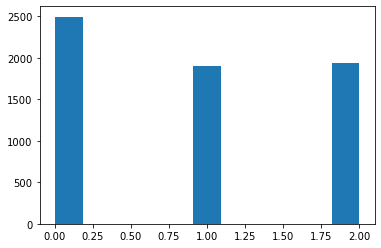

In [22]:
plt.hist(y_train, bins=11)
plt.show()

In [23]:
classes_to_index = dict((c, i) for i, c in enumerate(classes))
index_to_classes = dict((v, k) for k, v in classes_to_index.items())

In [24]:
classes_to_index

{0: 0, 1: 1, 2: 2}

In [25]:
index_to_classes

{0: 0, 1: 1, 2: 2}

In [26]:
names_to_ids = lambda labels: np.array([classes_to_index.get(x) for x in labels])

In [27]:
train_labels = names_to_ids(y_train)
print(train_labels[0])

0


In [28]:
train_labels

array([0, 0, 0, ..., 2, 0, 1])

## Creating the Model

1. Creating the model
2. Compiling the model

In [34]:
# model = Sequential()
# model.add(Bidirectional(LSTM(10, return_sequences=True), input_shape=(5, 10)))
# model.add(Bidirectional(LSTM(10)))
# model.add(Dense(5))
# model.add(Activation('softmax'))
# model.compile(loss='categorical_crossentropy', optimizer='rmsprop')

In [35]:
 # # With custom backward layer
 # model = Sequential()
 # forward_layer = LSTM(10, return_sequences=True)
 # backward_layer = LSTM(10, activation='relu', return_sequences=True,
 #                       go_backwards=True)
 # model.add(Bidirectional(forward_layer, backward_layer=backward_layer,
 #                         input_shape=(5, 10)))
 # model.add(Dense(5))
 # model.add(Activation('softmax'))
 # model.compile(loss='categorical_crossentropy', optimizer='rmsprop')

In [31]:
model = tf.keras.models.Sequential([
    tf.keras.layers.Embedding(10000, 16, input_length=35),
    tf.keras.layers.Bidirectional(tf.keras.layers.LSTM(20, return_sequences=True)),
    tf.keras.layers.Bidirectional(tf.keras.layers.LSTM(20)),
    tf.keras.layers.Dense(3, activation='softmax')
])

model.compile(
    loss='sparse_categorical_crossentropy',
    optimizer='adam',
    metrics=['accuracy']
)

model.summary()

Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
embedding (Embedding)        (None, 35, 16)            160000    
_________________________________________________________________
bidirectional (Bidirectional (None, 35, 40)            5920      
_________________________________________________________________
bidirectional_1 (Bidirection (None, 40)                9760      
_________________________________________________________________
dense (Dense)                (None, 3)                 123       
Total params: 175,803
Trainable params: 175,803
Non-trainable params: 0
_________________________________________________________________


## Training the Model

1. Preparing a validation set
2. Training the model

In [32]:
val_sequences = get_sequences(tokenizer, X_test)
val_labels = names_to_ids(y_test)

In [34]:

h = model.fit(
    padded_train_sequences, train_labels,
    validation_data=(val_sequences, val_labels),
    epochs=20,
    callbacks=[
        tf.keras.callbacks.EarlyStopping(monitor='val_accuracy', patience=2)
    ]
)

Train on 6333 samples, validate on 1584 samples
Epoch 1/20
6333/6333 [==============================] - 15s 2ms/sample - loss: 0.7905 - accuracy: 0.5623 - val_loss: 0.5796 - val_accuracy: 0.6477
Epoch 2/20
6333/6333 [==============================] - 5s 830us/sample - loss: 0.4659 - accuracy: 0.7747 - val_loss: 0.3579 - val_accuracy: 0.8788
Epoch 3/20
6333/6333 [==============================] - 5s 830us/sample - loss: 0.1853 - accuracy: 0.9360 - val_loss: 0.3363 - val_accuracy: 0.8908
Epoch 4/20
6333/6333 [==============================] - 5s 818us/sample - loss: 0.0911 - accuracy: 0.9741 - val_loss: 0.4161 - val_accuracy: 0.8718
Epoch 5/20
6333/6333 [==============================] - 5s 824us/sample - loss: 0.0531 - accuracy: 0.9842 - val_loss: 0.4663 - val_accuracy: 0.8769


## Evaluating the Model

1. Visualizing training history
2. Prepraring a test set
3. A look at individual predictions on the test set
4. A look at all predictions on the test set

In [36]:
_ = model.evaluate(val_sequences, val_labels)

1584/1584 [==============================] - 0s 197us/sample - loss: 0.4663 - accuracy: 0.8769


In [38]:
preds = model.predict_classes(val_sequences)

In [39]:
accuracy_score(val_labels, preds)

0.8768939393939394

In [40]:
balanced_accuracy_score(val_labels, preds)

0.8728694399333808

In [41]:
f1_score(val_labels, preds, average='weighted')

0.8766381262227285

## New Model Structure

In [29]:
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Bidirectional, LSTM, Dense, Embedding

In [30]:
 # With custom backward layer
 model = Sequential()
 model.add(Embedding(10000, 16, input_length=35))
 forward_layer = LSTM(20, return_sequences=True)
 backward_layer = LSTM(20, activation='relu', return_sequences=True,
                       go_backwards=True)
 model.add(Bidirectional(forward_layer, backward_layer=backward_layer))
 model.add(Dense(3, activation='softmax'))
 
 model.compile(loss='sparse_categorical_crossentropy', 
                optimizer='rmsprop',
                metrics=['accuracy'])

 model.summary()

Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
embedding (Embedding)        (None, 35, 16)            160000    
_________________________________________________________________
bidirectional (Bidirectional (None, 35, 40)            5920      
_________________________________________________________________
dense (Dense)                (None, 35, 3)             123       
Total params: 166,043
Trainable params: 166,043
Non-trainable params: 0
_________________________________________________________________


In [31]:
val_sequences = get_sequences(tokenizer, X_test)
val_labels = names_to_ids(y_test)

In [32]:
h = model.fit(
    padded_train_sequences, train_labels,
    validation_data=(val_sequences, val_labels),
    epochs=20,
    callbacks=[
        tf.keras.callbacks.EarlyStopping(monitor='val_accuracy', patience=2)
    ]
)

Train on 6333 samples, validate on 1584 samples
Epoch 1/20
  32/6333 [..............................] - ETA: 8:39WARNING:tensorflow:Early stopping conditioned on metric `val_accuracy` which is not available. Available metrics are: 


InvalidArgumentError:  assertion failed: [Condition x == y did not hold element-wise:] [x (loss/dense_loss/SparseSoftmaxCrossEntropyWithLogits/Shape_1:0) = ] [32 1] [y (loss/dense_loss/SparseSoftmaxCrossEntropyWithLogits/strided_slice:0) = ] [32 35]
	 [[node loss/dense_loss/SparseSoftmaxCrossEntropyWithLogits/assert_equal_1/Assert/Assert (defined at <ipython-input-32-e2e57103e139>:6) ]] [Op:__inference_distributed_function_4718]

Function call stack:
distributed_function


## Evaluating New Model Structure

In [ ]:
_ = model.evaluate(val_sequences, val_labels)